# Pix2PixHD on CityScape Dataset

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision

from IPython.display import display

from gans_package.models.Pix2PixHD import *
from gans_package.utils import weights_init, Pix2PixHD_Train 
from gans_package.dataloader import getCityScapeDataLoader

In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DEVICE

device(type='cuda')

In [3]:
SEED = 0
BATCH_SIZE = 32
LR = 1e-3
NUM_EPOCHS = 2

In [4]:
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

## Data

In [5]:
toPIL = torchvision.transforms.Compose([
    torchvision.transforms.ToPILImage(),
])

In [6]:
dataloader = getCityScapeDataLoader(data_path="../../data/cityscapes")

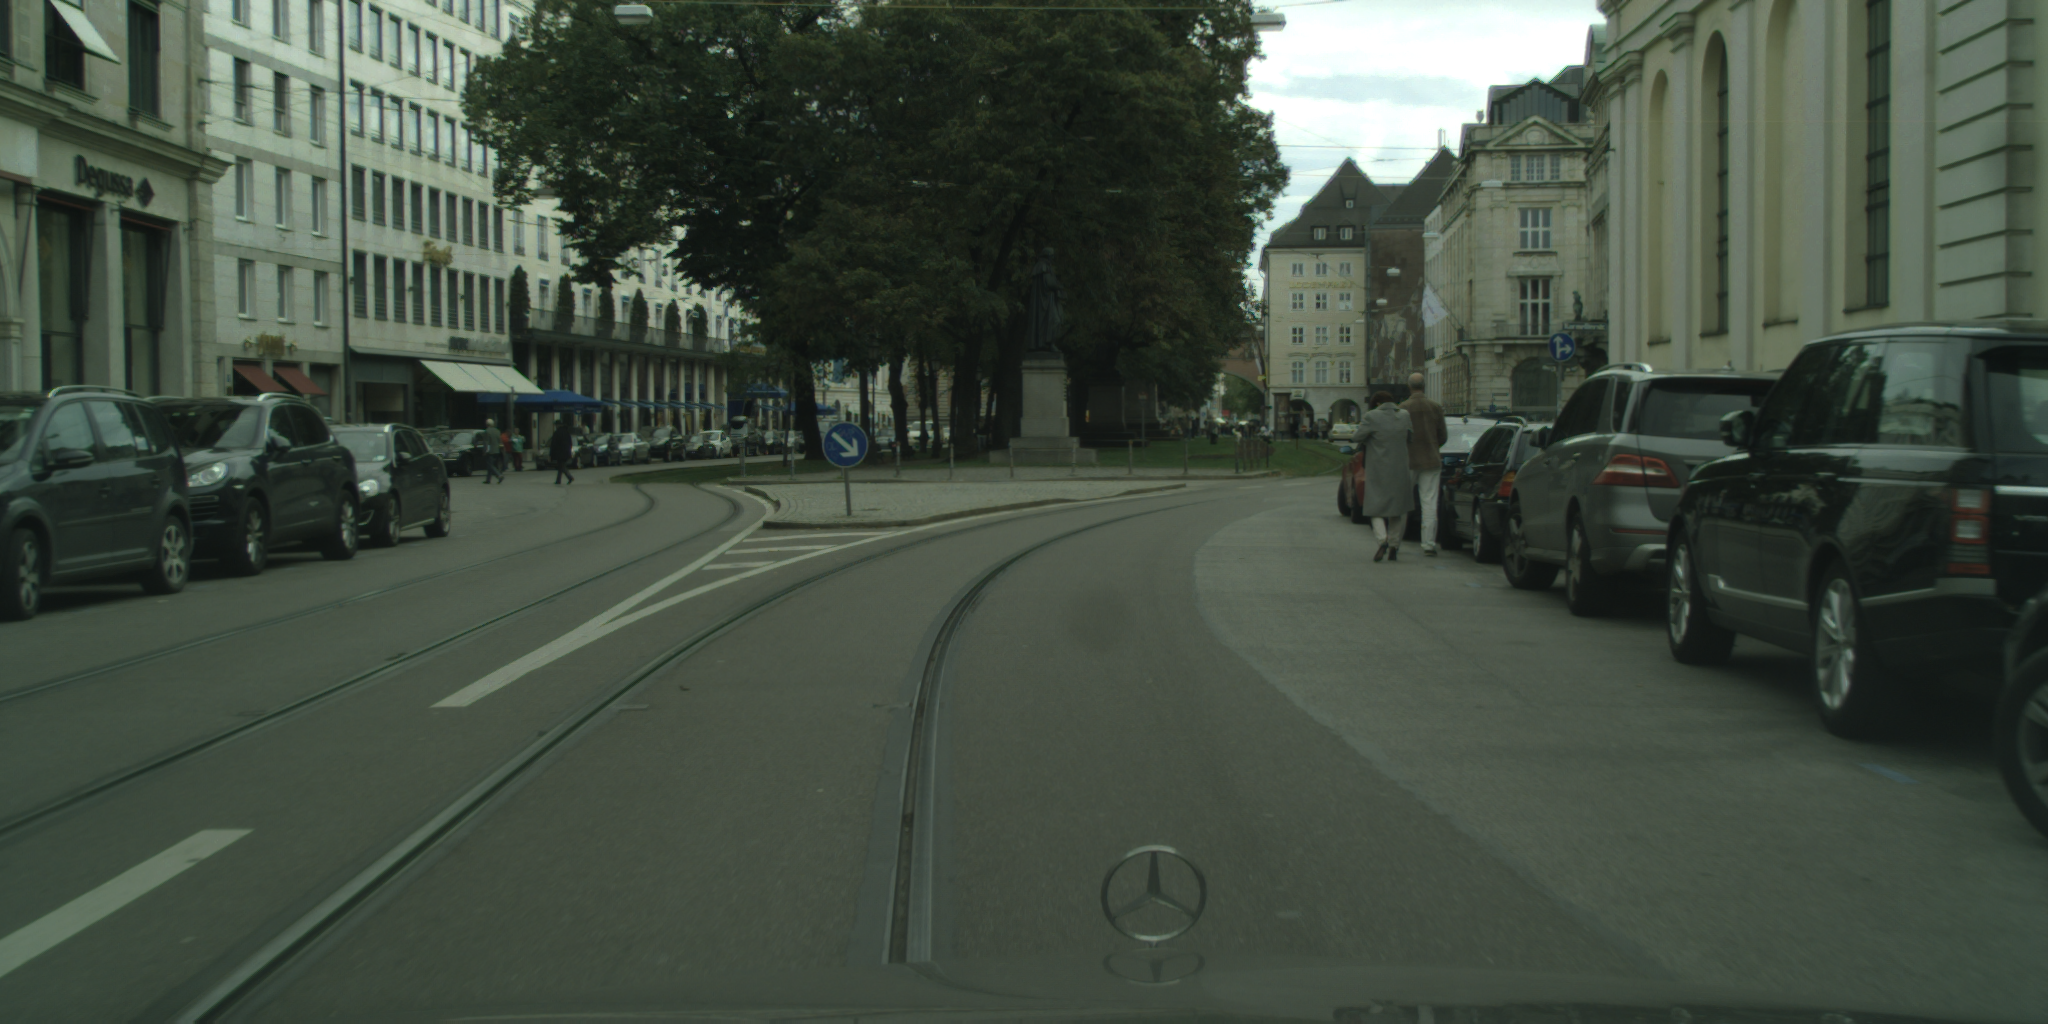

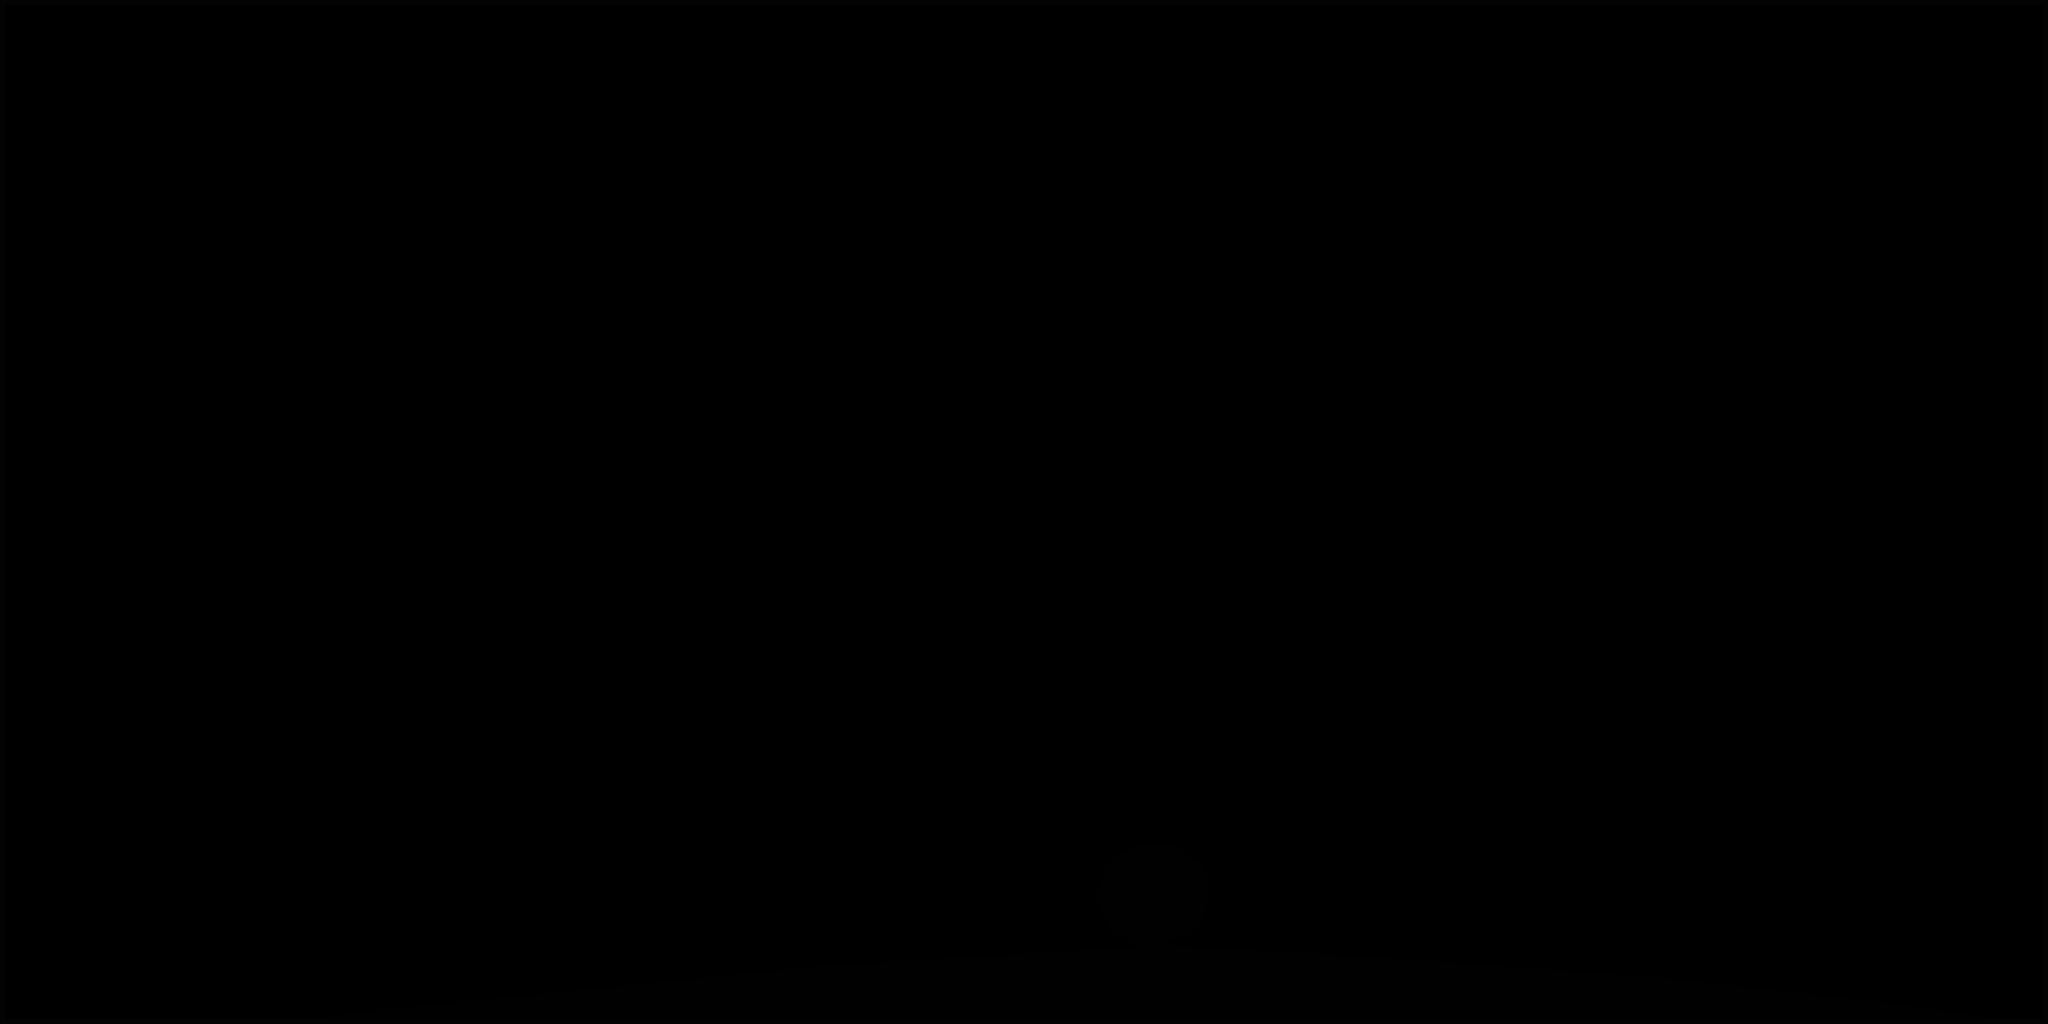

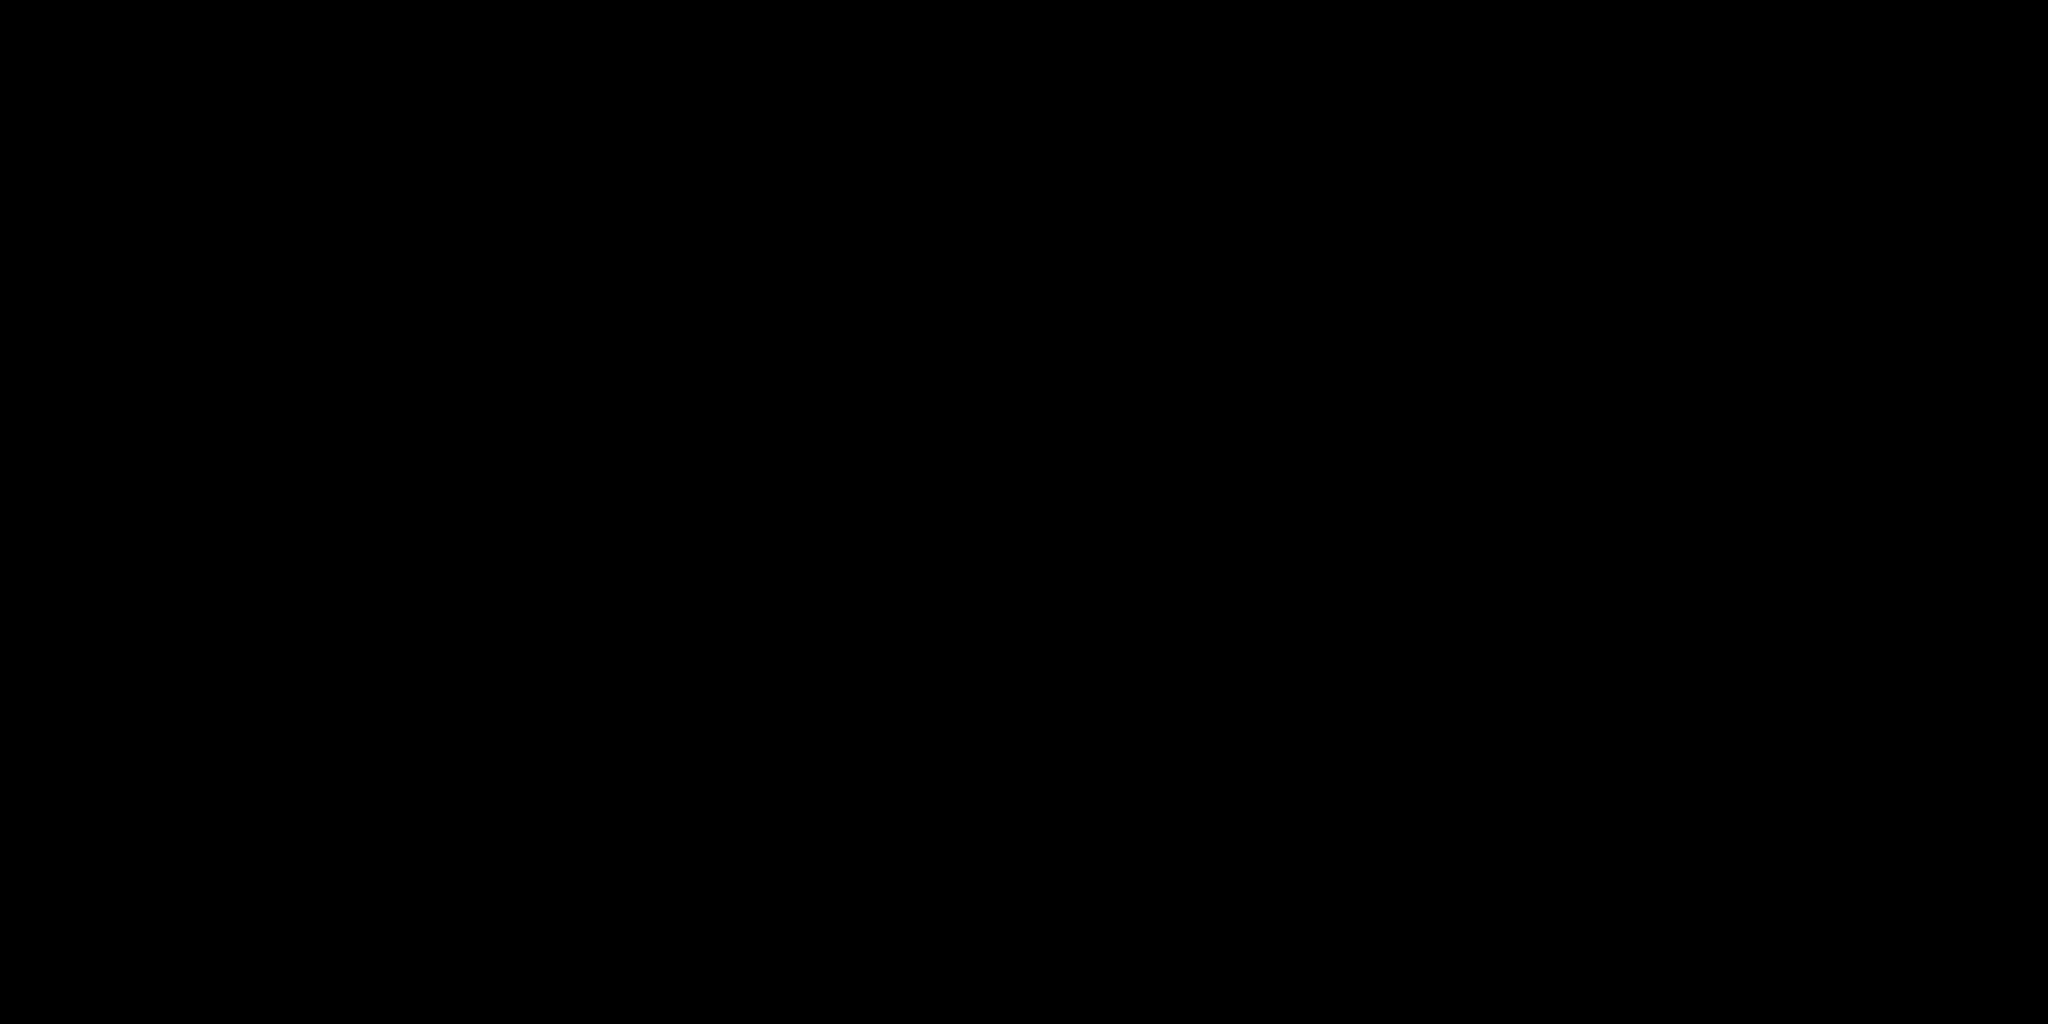

In [7]:
for image, (labels, instances) in dataloader:
    display(toPIL(image[0].squeeze(0)))
    display(toPIL(labels[0].squeeze(0)))
    display(toPIL(instances[0].squeeze(0)))
    break

## Model

In [8]:
global_generator = GlobalGenerator(3, 64, 3, 4, 9, 4).to(DEVICE).apply(weights_init)
print("GlobaL Generator: ")
print(global_generator)

local_enhancer = LocalEnhancer(3, 32, 3).to(DEVICE).apply(weights_init)
print("Local Enhancer: ")
print(local_enhancer)

d = MultiScaleDiscriminator(3).to(DEVICE).apply(weights_init)
print("Multiscale Discriminator: ")
print(d)

GlobaL Generator: 
GlobalGenerator(
  (G1): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU()
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU()
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU()
    (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (11): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (12): ReLU()
    (13): Conv2d(512, 1024, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (14): InstanceNorm2d(1024, eps=1e-05, momentum=0.1, affine=False, track_running_stats=Fa

## Train - Global Generaor

In [ ]:
g_optimizer = torch.optim.Adam(list(global_generator) + list(encoder), lr=LR)
d_optimizer = torch.optim.Adam(list(discriminator), lr=LR)

In [9]:
Pix2PixHD_Train(global_generator, discriminator, encoder, g_optimizer, d_optimizer, device=DEVICE)

TypeError: Pix2PixHD_Train() missing 7 required positional arguments: 'generator', 'discriminator', 'encoder', 'g_optimizer', 'd_optimizer', 'dataloader', and 'NUM_EPOCHS'

## Train - Pix2PixHD